In [7]:
import torch

In [21]:
from matplotlib import pyplot as plt

In [22]:
m_qk_1 = torch.zeros(120)

In [31]:

w_1 = torch.ones(120) - torch.rand(120) * 0.1

In [34]:
w_1[74:120] += torch.rand(120-74) * 0.32

In [23]:
m_qk_1[73] = 0.62

In [25]:
m_qk_1[98] = 1.34

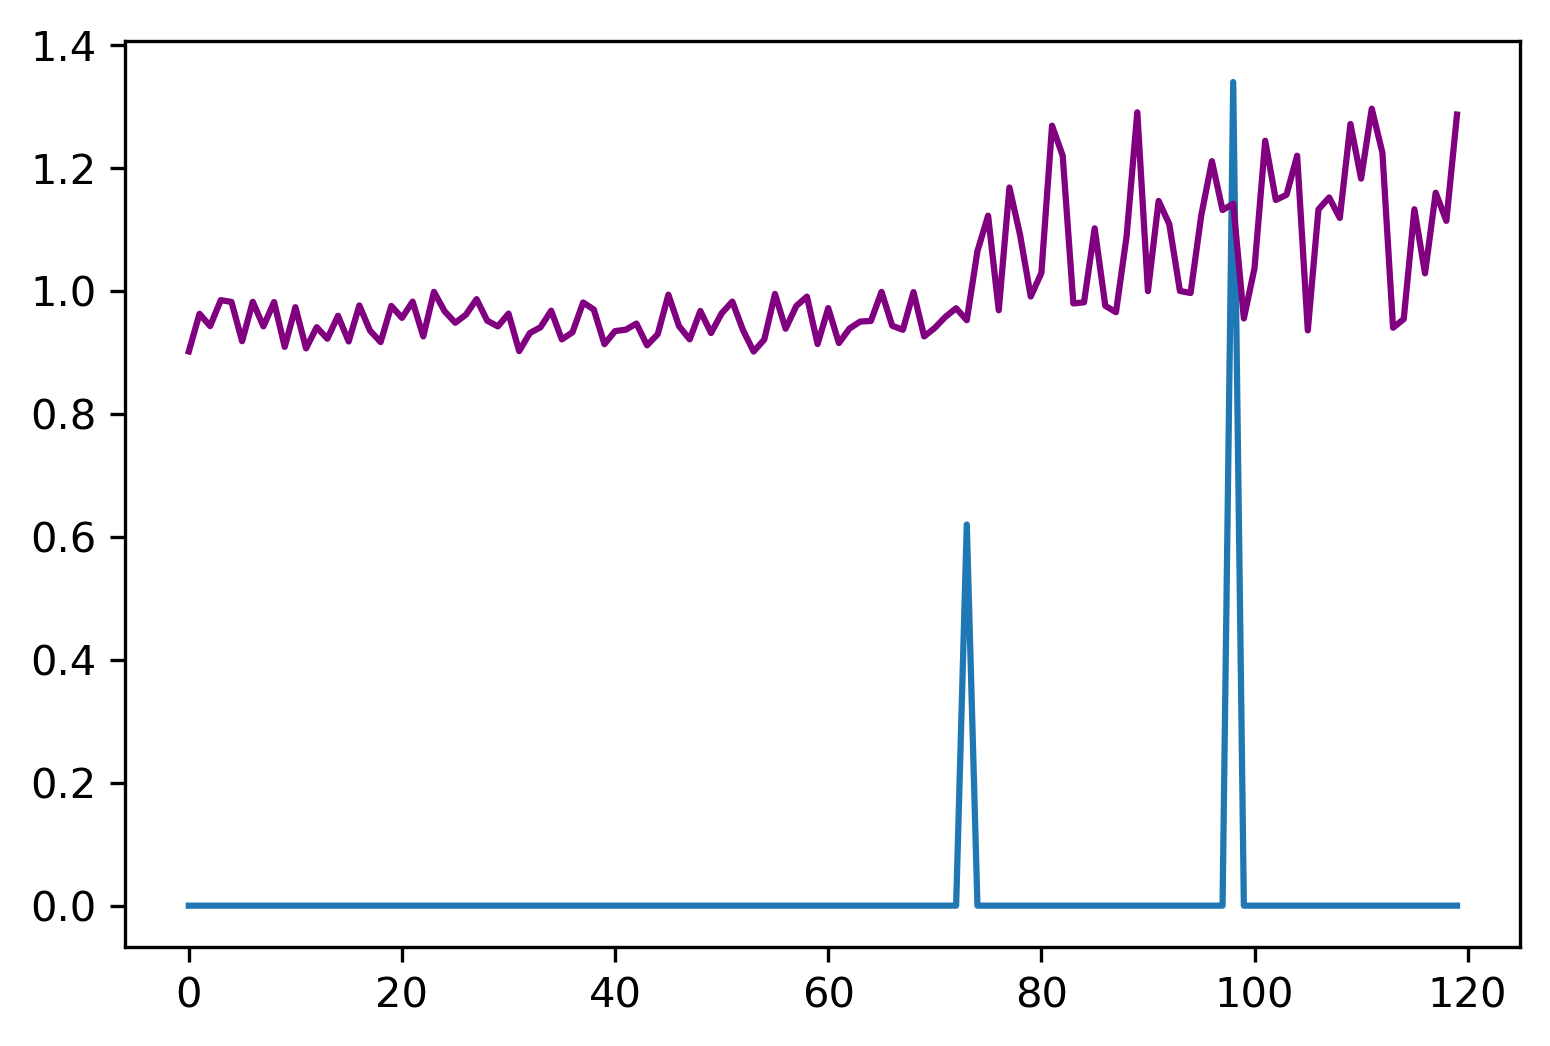

In [35]:
plt.figure(dpi=300)
plt.plot(range(len(m_qk_1)), m_qk_1.numpy())
plt.plot(range(len(w_1)), w_1.numpy(),c='purple')

In [2]:
from timm.models import resnet50

In [5]:
from thop import profile

In [5]:
r = resnet50()

In [7]:
profile(r, (torch.randn(32,3,540,960),))

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_bn() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'timm.models.resnet.Bottleneck'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.flatten.Flatten'>. Treat it as zero Macs and zero Params.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[WARN] Cannot find rule for <class 'timm.models.layers.adaptive_avgmax_pool.SelectAdaptivePool2d'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'timm.models.layers.linear.Linear'>. Treat it as zero Macs and zero Params.
[WARN] Canno

/mnt/lustre/hnwu/anaconda3/envs/pt1.8v/lib/python3.8/site-packages/thop/vision/basic_hooks.py:92: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  kernel = torch.DoubleTensor([*(x[0].shape[2:])]) // torch.DoubleTensor(list((m.output_size,))).squeeze()


(2732998787072.0, 23508032.0)

In [8]:
2732998787072.0 / 1e9

2732.998787072

In [9]:
from backbone import SwinTransformer3D

In [1]:
from torch.nn import GRU, TransformerEncoderLayer, TransformerDecoderLayer

In [16]:
g = TransformerEncoderLayer(512, 8)

In [20]:
67108864 / 1e9

0.067108864

In [19]:
profile(g, (torch.randn(1, 32, 512),))

[WARN] Cannot find rule for <class 'torch.nn.modules.linear.NonDynamicallyQuantizableLinear'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.activation.MultiheadAttention'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.transformer.TransformerEncoderLayer'>. Treat it as zero Macs and zero Params.


(67108864.0, 2099712.0)

In [11]:
profile(s, (torch.randn(1,3,32,540,960),))

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv3d'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'backbone.PatchEmbed3D'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.activation.Softmax'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'backbone.WindowAttention3D'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.linear.Identity'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.activation.GELU'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'backbone.Mlp'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rul

/mnt/lustre/hnwu/anaconda3/envs/pt1.8v/lib/python3.8/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


(757607915520.0, 27475872.0)

In [12]:
757607915520.0 / 1e9

757.60791552

In [15]:
import sys
sys.path.append('/mnt/lustre/hnwu/BasicSR/')

In [17]:
from i3dqa_arch import ResNet3d
hpdict = dict(
        pretrained=False,
        depth=50,
        conv1_kernel=(5, 7, 7),
        conv1_stride_t=2,
        pool1_stride_t=1,
        conv_cfg=dict(type='Conv3d'),
        norm_eval=False,
        inflate=((1, 1, 1), (1, 0, 1, 0), (1, 0, 1, 0, 1, 0), (0, 1, 0)),
        zero_init_residual=False,
        with_pool2=False,
        )
backbone = ResNet3d(**hpdict).cuda()

In [21]:
profile(backbone, (torch.randn(1,32,3,540,960).cuda(),))

[WARN] Cannot find rule for <class 'mmcv.cnn.bricks.wrappers.Conv3d'>. Treat it as zero Macs and zero Params.
[INFO] Register count_bn() for <class 'torch.nn.modules.batchnorm.BatchNorm3d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[WARN] Cannot find rule for <class 'mmcv.cnn.bricks.conv_module.ConvModule'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool3d'>.
[WARN] Cannot find rule for <class 'i3dqa_arch.Bottleneck3d'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'i3dqa_arch.ResNet3d'>. Treat it as zero Macs and zero Params.


(11063623680.0, 53120.0)

In [22]:
11063623680.0 / 1e9

11.06362368

In [28]:
profile(s2, (torch.randn(1,3,32,540,960).cuda(),))

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv3d'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'backbone.PatchEmbed3D'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.activation.Softmax'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'backbone.WindowAttention3D'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.linear.Identity'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.activation.GELU'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'backbone.Mlp'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rul

RuntimeError: CUDA out of memory. Tried to allocate 2.40 GiB (GPU 0; 31.75 GiB total capacity; 25.26 GiB already allocated; 2.03 GiB free; 28.36 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [26]:
1515215831040.0 / 1e9

1515.21583104